In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable 

# The Cubic Map

$$
x_{n+1} = rx_{n}(1-x_{n}^2)
$$

$$
1 \leq r \leq 2.6
$$
$$
0 \leq x \leq 1
$$

## Cubic Map as a function of x and its derivative
$$
f(x) = rx(1-x^2)
$$

$$
f'(x) = r(1 - 3x^2)
$$

## Lyapunov Exponent

$$
\lambda = \frac{1}{N} \sum_{i=0}^{N-1} \ln{|f'(x_{i})|}
$$

In [2]:
# The function for the cubic map
def cubic_map(x: float, r: float) -> float:
    return r * x * (1 - x**2)

def cubic_map_2(x: np.ndarray, r: float) -> np.ndarray:
    return r * x * (1 - x**2)

# The derivative of the cubic map function
def derivative_cubic_map(x: float, r: float) -> float:
    return r * (1 - 3 * x**2)

# The iterative cubic map function
def iterative_cubic_map(x: np.ndarray, r: float, n: int) -> np.ndarray:
    for i in range(1,n):
        x[i] = cubic_map(x[i - 1], r)
    return x

def Lyapunov_exponent(fp: Callable[[float, float], float], dfp: Callable[[float, float], float], x0: float, r: float, n: int) -> float:
    sum = 0
    x = x0
    for i in range(n):
        sum += np.log(np.abs(dfp(x, r)))
        x = fp(x, r)
    return sum / n

## Initializing values

In [3]:
N = 1000
r_vals = np.linspace(0, 2.6, N)

x_arr = np.zeros(N)

# some initial condition
x_arr[0] = 0.5

## Plotting the Cubic Map 

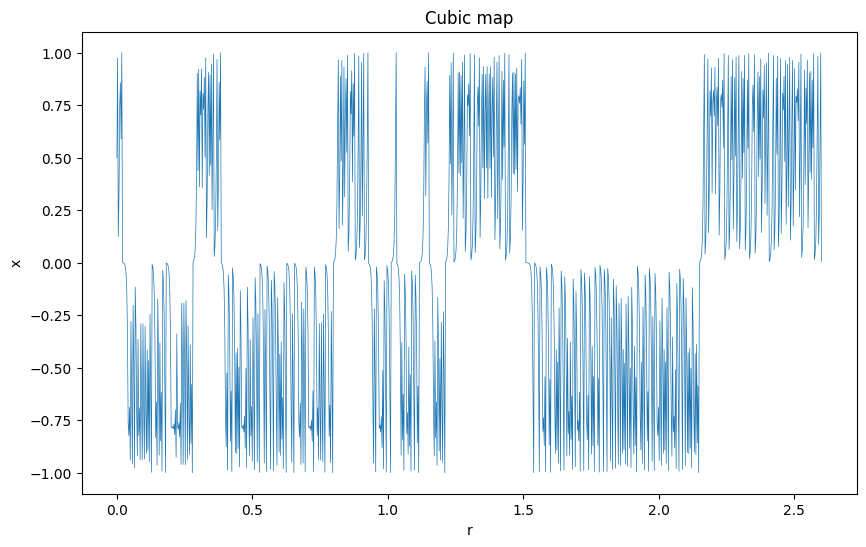

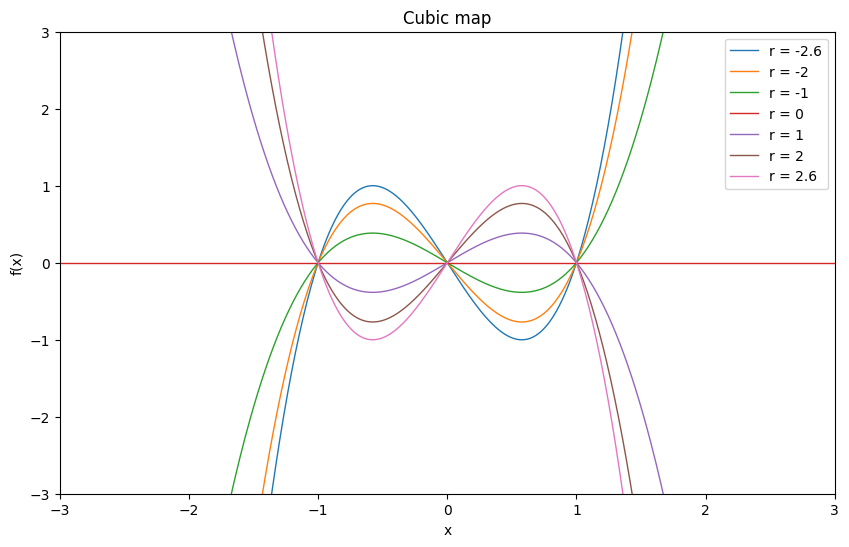

In [8]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Calculate the cubic map for each r value
for i in range(N):
    x_arr = iterative_cubic_map(x_arr, r_vals[i], 1000)

# # Plot the map with reduced line width and increased transparency
plt.plot(r_vals, x_arr, lw=0.5)

plt.xlabel('r')
plt.ylabel('x')
plt.title('Cubic map')
plt.show()

# # plot the cubic map as a function of x
r = [-2.6, -2, -1, 0, 1, 2, 2.6]
x = np.linspace(-5, 5, 1000)

plt.figure(figsize=(10, 6))
for i in r:
    plt.plot(x, cubic_map(x, i), label=f'r = {i}', lw=1)
    
plt.ylim(-3, 3)
plt.xlim(-3, 3)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Cubic map')
plt.legend()
plt.show()

# 

## Ploting the Bifurcation Diagram

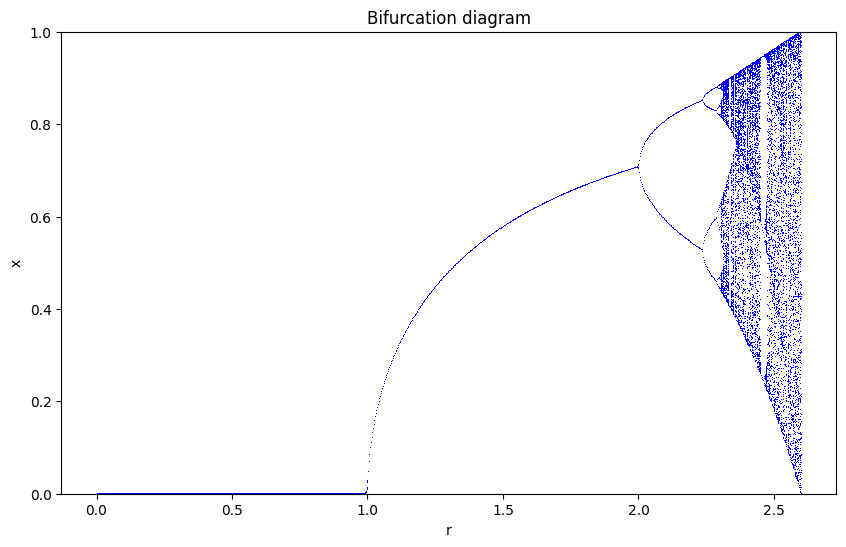

In [14]:
# plot the bifurcation diagram
x0 = 0.5
N_skip = 500  # number of iterations to skip
N_plot = 100  # number of iterations to plot

plt.figure(figsize=(10, 6))

for i in range(N):
    r = r_vals[i]
    x = x0
    # Skip the transient iterations
    for _ in range(N_skip):
        x = cubic_map(x, r)
    # Plot the steady state iterations
    x_vals = np.zeros(N_plot)
    for j in range(N_plot):
        x = cubic_map(x, r)
        x_vals[j] = x
    plt.plot([r]*N_plot, x_vals, ',b', alpha=1)

plt.ylim(0, 1)
plt.xlabel('r')
plt.ylabel('x')
plt.title('Bifurcation diagram')
plt.show()

## Ploting the Lyapunov Exponent 

/var/folders/nf/f487qsm50f521dzfrm80rks80000gn/T/ipykernel_75012/2899673227.py:22: RuntimeWarning: divide by zero encountered in log
  sum += np.log(np.abs(dfp(x, r)))


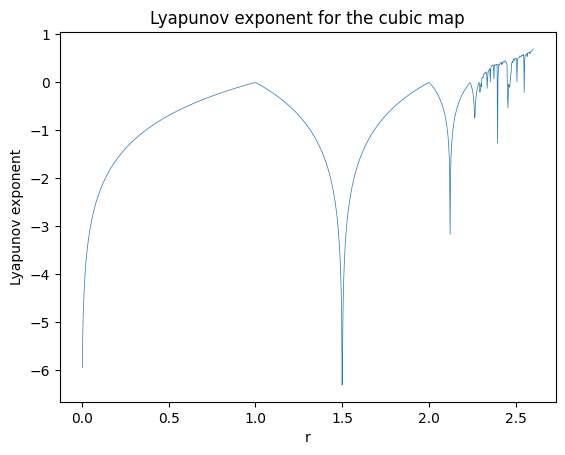

In [6]:
lyapunov = np.zeros(N)

# calculate the Lyapunov exponent for each value of r
for i in range(N):
    lyapunov[i] = Lyapunov_exponent(cubic_map, derivative_cubic_map, x_arr[0], r_vals[i], 1000)

plt.plot(r_vals, lyapunov, lw=0.5)
plt.xlabel('r')
plt.ylabel('Lyapunov exponent')
plt.title('Lyapunov exponent for the cubic map')

plt.show()

## Shannon Entropy

$$
H(x) = - \sum_{i=1}^{n}p(x_{i})\log_2{p(x_{i})}
$$

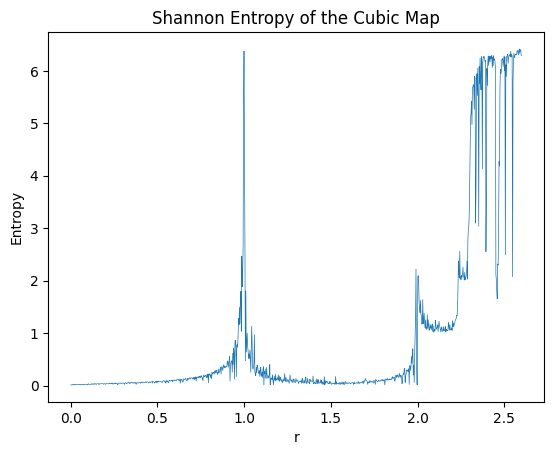

In [7]:
def shannon_entropy(probabilities: np.ndarray) -> float:
    epsilon = 1e-10  # small constant to avoid log2(0)
    return -np.sum(probabilities * np.log2(probabilities + epsilon))

bins = 100
entropies = []

# Iterate over different values of r
for r in r_vals:
    # Generate time series
    x_values = [np.random.random()]  # Initial condition
    for _ in range(N):
        x_values.append(cubic_map(x_values[-1], r))

    # Calculate histogram and probability distribution
    counts, _ = np.histogram(x_values, bins=bins, density=True)
    probabilities = counts / np.sum(counts)

    # Calculate Shannon entropy
    entropy = shannon_entropy(probabilities)
    entropies.append(entropy)

# Plot
plt.plot(r_vals, entropies, lw=0.5)
plt.title('Shannon Entropy of the Cubic Map')
plt.xlabel('r')
plt.ylabel('Entropy')
plt.show()